# DBSCAN - Clustering

DBSCAN is an ML clustering algorithm to efficiently discard outlier points and find clusters with other clusters

In [132]:
%pylab inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

Populating the interactive namespace from numpy and matplotlib


RandomState(MT19937) at 0x4D3C848

## Algorithm

In [133]:
df = pd.read_csv('weather.csv')

In [134]:
df

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800
1337,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801
1338,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249
1339,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992


In [135]:
df = df[pd.notnull(df['Tm'])]

In [136]:
df.reset_index(drop=True)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800
1252,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801
1253,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249
1254,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992


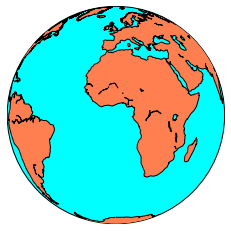

In [137]:
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcoastlines()

plt.show()

In [141]:
min_lat = -140
max_lat = -50
min_long = 40
max_long = 65
rcParams['figure.figsize'] = (14,10)
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=min_lat, llcrnrlat=min_long, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lat, urcrnrlat=max_long) #max longitude (urcrnrlon) and latitude (urcrnrlat)

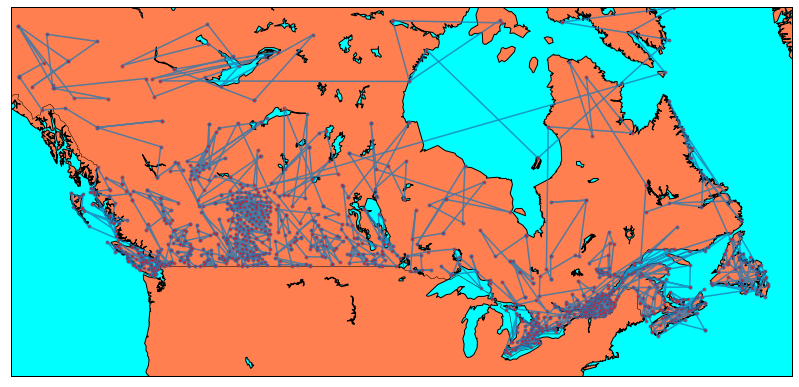

In [142]:

my_map.drawmapboundary(fill_color='aqua')
df = df[(df['Long'] > min_lat) & (df['Long'] <max_lat) & (df['Lat'] > min_long) &(df['Lat'] < max_long)]
my_map.fillcontinents(color='coral',lake_color='aqua')
my_map.drawcoastlines()
my_map.drawcountries()
xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()
my_map.plot(df['xm'], df['ym'],markerfacecolor =([1,0,0]),  marker='o', markersize= 3, alpha = 0.75)

In [143]:
df

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.807806e+06,1.396332e+06
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.764329e+06,1.377564e+06
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.773336e+06,1.378409e+06
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.809363e+06,1.362546e+06
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.841498e+06,1.311615e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800,8.708449e+06,2.799614e+06
1337,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801,8.708560e+06,2.799815e+06
1338,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249,8.608040e+06,3.168105e+06
1339,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992,9.078172e+06,2.438267e+06


In [145]:
cdf = df[['xm','ym']]

In [146]:
cdf

,xm,ym
0,1.807806e+06,1.396332e+06
1,1.764329e+06,1.377564e+06
2,1.773336e+06,1.378409e+06
4,1.809363e+06,1.362546e+06
5,1.841498e+06,1.311615e+06
...,...,...
1336,8.708449e+06,2.799614e+06
1337,8.708560e+06,2.799815e+06
1338,8.608040e+06,3.168105e+06
1339,9.078172e+06,2.438267e+06


In [147]:
cdf = cdf.values

In [149]:
cdf = np.nan_to_num(cdf)

In [150]:
cdf = StandardScaler().fit_transform(cdf)

In [151]:
cdf

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.46577713,  1.86125634],
       [ 1.64788589,  0.95789607],
       [ 1.2814717 ,  0.53978899]])

In [152]:
db = DBSCAN(eps=0.15, min_samples=10).fit(cdf)

In [153]:
set(db.labels_)
df['Clusdb'] = db.labels_

## Outliers are marked with -1

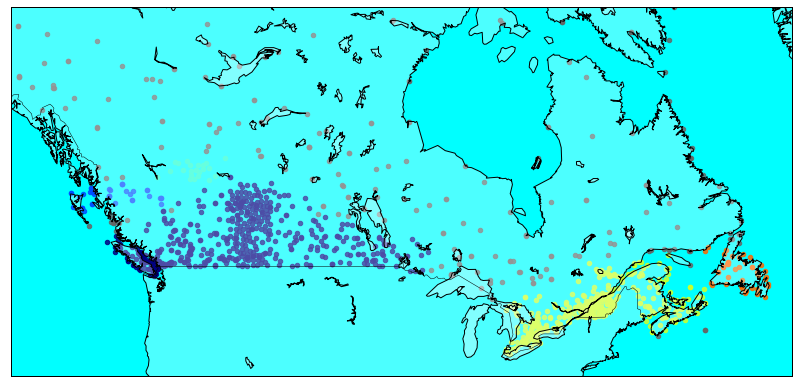

In [161]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=min_lat, llcrnrlat=min_long, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lat, urcrnrlat=max_long) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.fillcontinents(color='white',alpha=0.3)
my_map.drawmapboundary(fill_color='aqua')
my_map.drawcoastlines()
my_map.drawcountries()
labels = db.labels_
clusterNum = len(set(labels))

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Clusdb == clust_number]       
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)


